<a href="https://colab.research.google.com/github/xhovon/Heart_disease_ML/blob/main/heartattack_prediction_with_voting_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


***Reading The Dataset***

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

#uploading csv file
heart = pd.read_csv("heart.csv")
heart.head()

Saving heart.csv to heart.csv


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


***Checking the shape of DataFrame***

In [ ]:
print('Number of rows are',heart.shape[0], 'and number of columns are ',heart.shape[1])

Number of rows are 918 and number of columns are  12


***Checking for null values***

In [ ]:
heart.isnull().sum()/len(heart)*100

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

**No null values found**

***Checking For datatypes of the attributes***

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


***Checking for duplicate rows***

In [ ]:
heart[heart.duplicated()]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


***Removing the duplicates***

In [ ]:
heart.drop_duplicates(keep='first',inplace=True)


**Checking new shape**

In [ ]:
print('Number of rows are',heart.shape[0], 'and number of columns are ',heart.shape[1])

Number of rows are 918 and number of columns are  12


***Checking statistical data***

In [ ]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


***Computing the correlation matrix***

In [ ]:
heart.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


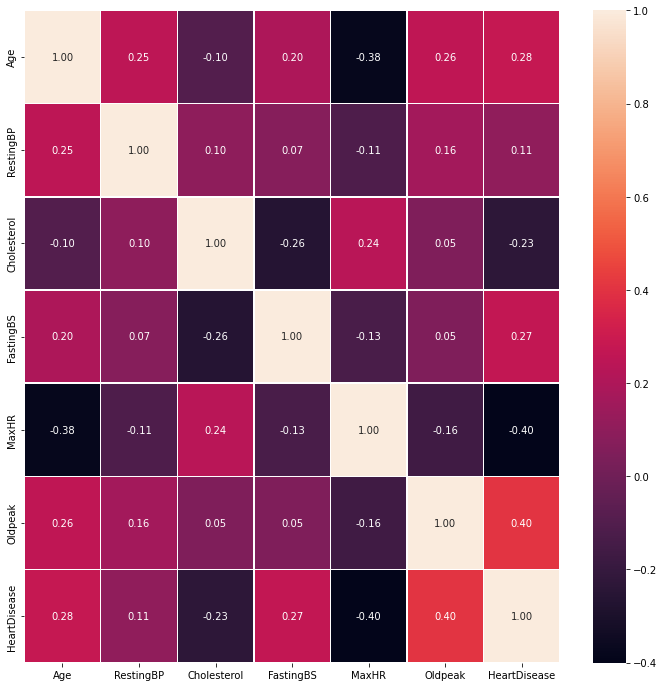

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(heart.corr(),annot=True, linewidth=0.5,fmt='0.2f')
plt.show()

# ***Data Visualization***

***Breakdown of gender***

people having heart disease=1 are 410 & not having heart disease=0 are 508


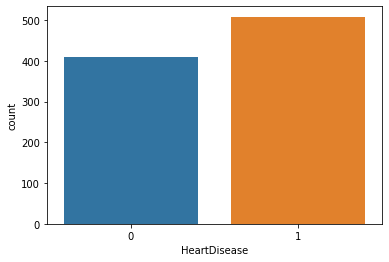

In [ ]:
x= heart.HeartDisease.value_counts()
print(f'people having heart disease=1 are {x[0]} & not having heart disease=0 are {x[1]}')
p = sns.countplot(data=heart, x="HeartDisease")
plt.show()

Number of people having Sex as 1 are 725 and Number of people having Sex as 0 are 193


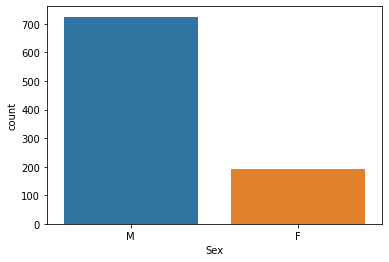

In [ ]:
x= heart.Sex.value_counts()
print(f'Number of people having Sex as 1 are {x[0]} and Number of people having Sex as 0 are {x[1]}')
p = sns.countplot(data=heart, x="Sex")
plt.show()

***Density distribution for Age***

<Figure size 720x720 with 0 Axes>

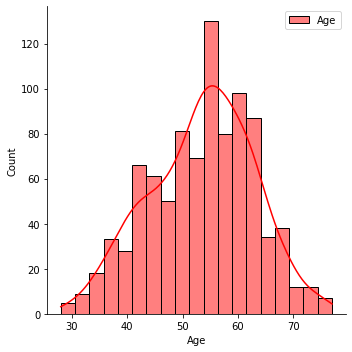

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(heart.Age, color="red", label="Age", kde= True)
plt.legend()

**Density distribution is highest for age group 55 to 60**


<Figure size 1440x1440 with 0 Axes>

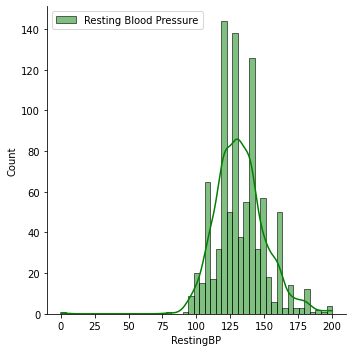

In [ ]:
plt.figure(figsize=(20,20))
sns.displot(heart.RestingBP , color="green", label="Resting Blood Pressure", kde= True)
plt.legend()

***Trtbs has the highest count around 130***

***Heart Attack Vs Age***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


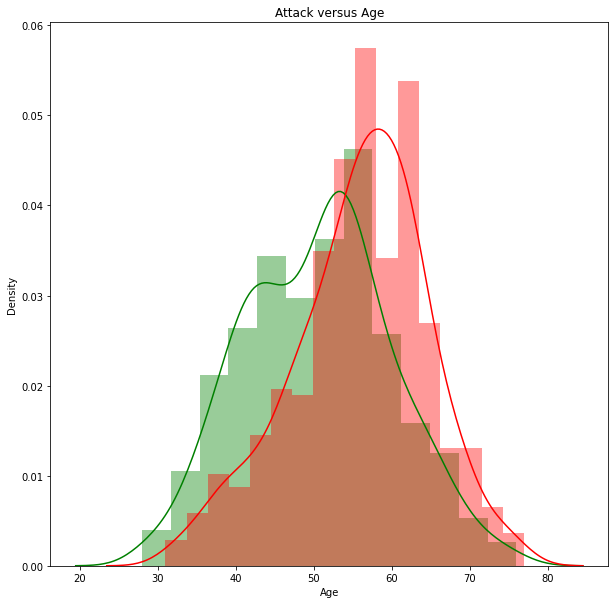

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['HeartDisease'] == 0]["Age"], color='green',kde=True,) 
sns.distplot(heart[heart['HeartDisease'] == 1]["Age"], color='red',kde=True)
plt.title('Attack versus Age')
plt.show()



# **Data preprocessing**

In [ ]:
heart = pd.get_dummies(heart, drop_first=True)

In [ ]:
heart

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


In [ ]:

heart.shape

(918, 16)

In [ ]:
# Split data into X and y
x = heart.drop(["HeartDisease"], axis=1)
y = heart["HeartDisease"]

In [ ]:
x = heart.iloc[:, 1:-1].values
y = heart.iloc[:, -1].values
x,y

(array([[140., 289.,   0., ...,   0.,   0.,   0.],
        [160., 180.,   0., ...,   0.,   0.,   1.],
        [130., 283.,   0., ...,   1.,   0.,   0.],
        ...,
        [130., 131.,   0., ...,   0.,   1.,   1.],
        [130., 236.,   0., ...,   0.,   0.,   1.],
        [138., 175.,   0., ...,   0.,   0.,   0.]]),
 array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 0,

In [ ]:
x.shape

(918, 14)

In [ ]:
y.shape

(918,)

**Splitting the dataset into training and testing data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)


In [ ]:
print('Shape for training data', x_train.shape, y_train.shape)
print('Shape for testing data', x_test.shape, y_test.shape)

Shape for training data (734, 14) (734,)
Shape for testing data (184, 14) (184,)


In [ ]:
x_train,x_test

(array([[140.,   0.,   1., ...,   0.,   1.,   1.],
        [115.,   0.,   0., ...,   0.,   1.,   1.],
        [160., 360.,   0., ...,   0.,   0.,   0.],
        ...,
        [128., 303.,   0., ...,   0.,   0.,   0.],
        [134., 273.,   0., ...,   0.,   1.,   0.],
        [108., 243.,   0., ...,   0.,   0.,   0.]]),
 array([[115.,   0.,   1., ...,   0.,   0.,   1.],
        [120., 302.,   0., ...,   0.,   0.,   1.],
        [110.,   0.,   1., ...,   0.,   0.,   1.],
        ...,
        [112., 230.,   0., ...,   0.,   0.,   0.],
        [130., 283.,   0., ...,   1.,   0.,   0.],
        [160.,   0.,   1., ...,   0.,   1.,   1.]]))

**1. Logistic Regression**

In [ ]:
model = LogisticRegression(solver='liblinear', max_iter=500)
model.fit(x_train, y_train)
predicted=model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")



Confusion Matrix : 
 [[103   4]
 [  6  71]]


The accuracy of Logistic Regression is :  94.56521739130434 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


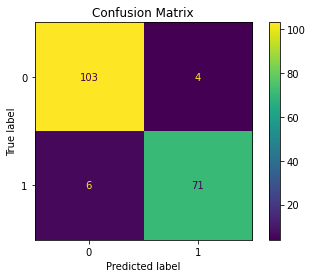

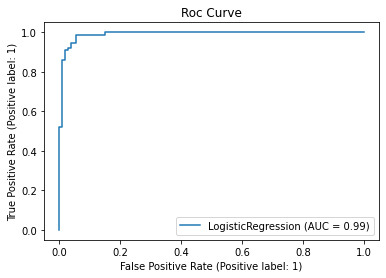

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test);
plt.title('Confusion Matrix');
from sklearn.metrics import plot_roc_curve,roc_curve,roc_auc_score
plot_roc_curve(model, x_test, y_test);
plt.title('Roc Curve');

In [ ]:
from sklearn.metrics import classification_report
print("train set scores")
print(classification_report(y_train, model.predict(x_train)))
print("test set scores")
print(classification_report(y_test, model.predict(x_test)))

train set scores
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       416
           1       0.93      0.95      0.94       318

    accuracy                           0.95       734
   macro avg       0.95      0.95      0.95       734
weighted avg       0.95      0.95      0.95       734

test set scores
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       107
           1       0.95      0.92      0.93        77

    accuracy                           0.95       184
   macro avg       0.95      0.94      0.94       184
weighted avg       0.95      0.95      0.95       184



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


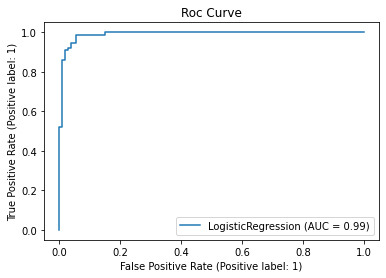

In [ ]:
from sklearn.metrics import plot_roc_curve,roc_curve,roc_auc_score
plot_roc_curve(model, x_test, y_test);
plt.title('Roc Curve');

**2.Gaussian Naive Bayes**

In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  94.02173913043478 %


In [ ]:
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print("train set scores")
print(classification_report(y_train, model.predict(x_train)))
print("test set scores")
print(classification_report(y_test, model.predict(x_test)))

Confusion Matrix : 
 [[103   4]
 [  7  70]]
train set scores
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       416
           1       0.93      0.95      0.94       318

    accuracy                           0.95       734
   macro avg       0.95      0.95      0.95       734
weighted avg       0.95      0.95      0.95       734

test set scores
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       107
           1       0.95      0.91      0.93        77

    accuracy                           0.94       184
   macro avg       0.94      0.94      0.94       184
weighted avg       0.94      0.94      0.94       184



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


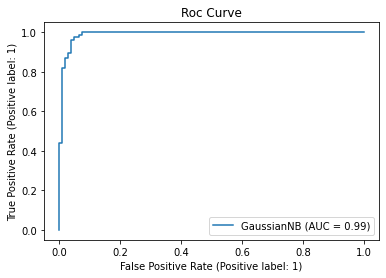

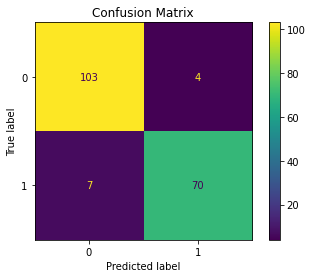

In [ ]:

plot_roc_curve(model, x_test, y_test);
plt.title('Roc Curve');
plot_confusion_matrix(model, x_test, y_test);
plt.title('Confusion Matrix');

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


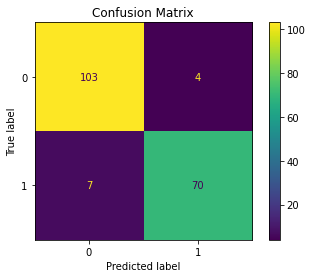

In [ ]:

plot_confusion_matrix(model, x_test, y_test);
plt.title('Confusion Matrix');


**3.Support Vector Machine**

In [ ]:
model = SVC(kernel='linear',gamma='auto')
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")



The accuracy of SVM is :  96.19565217391305 %


In [ ]:
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print("train set scores")
print(classification_report(y_train, model.predict(x_train)))
print("test set scores")
print(classification_report(y_test, model.predict(x_test)))

Confusion Matrix : 
 [[104   3]
 [  4  73]]
train set scores
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       416
           1       0.94      0.95      0.94       318

    accuracy                           0.95       734
   macro avg       0.95      0.95      0.95       734
weighted avg       0.95      0.95      0.95       734

test set scores
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       107
           1       0.96      0.95      0.95        77

    accuracy                           0.96       184
   macro avg       0.96      0.96      0.96       184
weighted avg       0.96      0.96      0.96       184



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


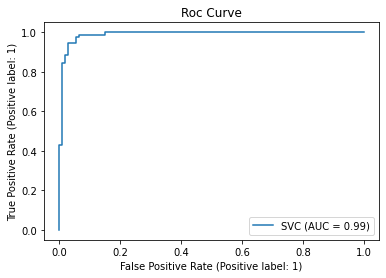

In [ ]:

plot_roc_curve(model, x_test, y_test);
plt.title('Roc Curve');

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


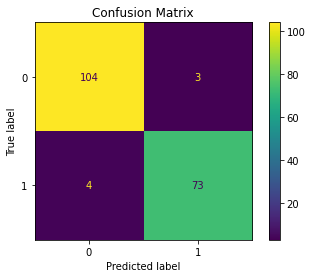

In [ ]:

plot_confusion_matrix(model, x_test, y_test);
plt.title('Confusion Matrix');


**4.Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, random_state = 0)  
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")


The accuracy of Random Forest is :  94.02173913043478 %


In [ ]:
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print("train set scores")
print(classification_report(y_train, model.predict(x_train)))
print("test set scores")
print(classification_report(y_test, model.predict(x_test)))

Confusion Matrix : 
 [[103   4]
 [  7  70]]
train set scores
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       416
           1       1.00      1.00      1.00       318

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734

test set scores
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       107
           1       0.95      0.91      0.93        77

    accuracy                           0.94       184
   macro avg       0.94      0.94      0.94       184
weighted avg       0.94      0.94      0.94       184



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


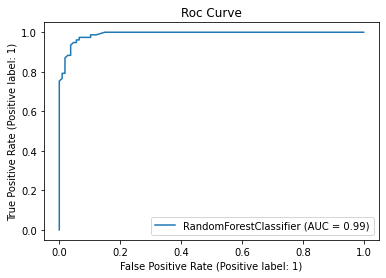

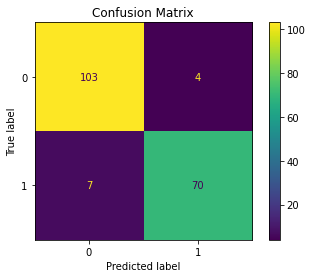

In [ ]:

plot_roc_curve(model, x_test, y_test);
plt.title('Roc Curve');
plot_confusion_matrix(model, x_test, y_test);
plt.title('Confusion Matrix');

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


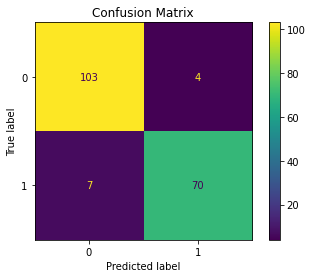

In [ ]:

plot_confusion_matrix(model, x_test, y_test);
plt.title('Confusion Matrix');


**5.X Gradient Boosting**

In [ ]:
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(x_train, y_train)
   
predicted = model.predict(x_test)
   
cm = confusion_matrix(y_test, predicted)
print()
print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, predicted)*100, "%")



The accuracy of X Gradient Boosting is :  95.65217391304348 %


In [ ]:
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print("train set scores")
print(classification_report(y_train, model.predict(x_train)))
print("test set scores")
print(classification_report(y_test, model.predict(x_test)))

Confusion Matrix : 
 [[104   3]
 [  5  72]]
train set scores
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       416
           1       0.98      0.99      0.99       318

    accuracy                           0.99       734
   macro avg       0.99      0.99      0.99       734
weighted avg       0.99      0.99      0.99       734

test set scores
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       0.96      0.94      0.95        77

    accuracy                           0.96       184
   macro avg       0.96      0.95      0.96       184
weighted avg       0.96      0.96      0.96       184



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


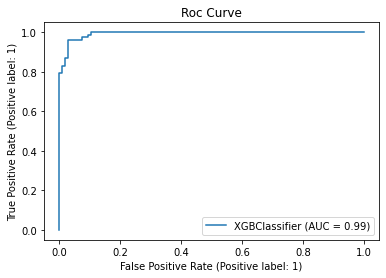

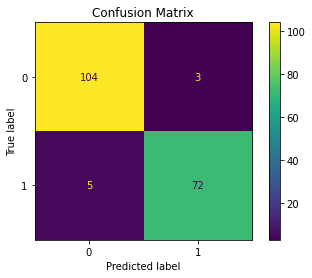

In [ ]:

plot_roc_curve(model, x_test, y_test);
plt.title('Roc Curve');
plot_confusion_matrix(model, x_test, y_test);
plt.title('Confusion Matrix');

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


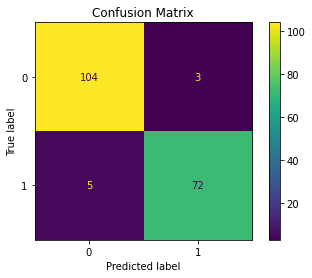

In [ ]:

plot_confusion_matrix(model, x_test, y_test);
plt.title('Confusion Matrix');


**Voting**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
model1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model2 = GaussianNB()
model3 = RandomForestClassifier(n_estimators = 100, random_state = 0)
model4 = xgb.XGBClassifier(use_label_encoder=False)
model5 = SVC(kernel='linear',gamma='auto',probability=True)

In [ ]:
# Instantiate the voting classifier
voting = VotingClassifier([('NB', model2),
                          ('XGBoost', model4),
                           ('SVM', model5),],
                            voting='hard')

In [ ]:
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('NB', GaussianNB()),
                             ('XGBoost',
                              XGBClassifier(use_label_encoder=False)),
                             ('SVM',
                              SVC(gamma='auto', kernel='linear',
                                  probability=True))])

In [ ]:
p_train_voting = voting.predict(x_train)
p_test_voting = voting.predict(x_test)
print ("The accuracy of voting is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of voting is :  95.65217391304348 %


In [ ]:
conf = confusion_matrix(y_test, p_test_voting)
print ("Confusion Matrix : \n", conf)
print("train set scores")
print(classification_report(y_train, model.predict(x_train)))
print("test set scores")
print(classification_report(y_test, model.predict(x_test)))

Confusion Matrix : 
 [[104   3]
 [  4  73]]
train set scores
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       416
           1       0.98      0.99      0.99       318

    accuracy                           0.99       734
   macro avg       0.99      0.99      0.99       734
weighted avg       0.99      0.99      0.99       734

test set scores
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       0.96      0.94      0.95        77

    accuracy                           0.96       184
   macro avg       0.96      0.95      0.96       184
weighted avg       0.96      0.96      0.96       184



Scoring Metrics for Soft Voting (Validation)
Balanced Accuracy Score = 0.960007282437189
Accuracy Score = 0.9619565217391305
Precision Score = 0.9605263157894737
F1 Score = 0.9542483660130718
Recall Score = 0.948051948051948
ROC AUC Score = 0.9600072824371889
Confusion Matrix
[[104   3]
 [  4  73]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       107
           1       0.96      0.95      0.95        77

    accuracy                           0.96       184
   macro avg       0.96      0.96      0.96       184
weighted avg       0.96      0.96      0.96       184

Scoring Metrics for Soft Voting (Training)
Balanced Accuracy Score = 0.9563528059990325
Accuracy Score = 0.9564032697547684
Precision Score = 0.9440993788819876
F1 Score = 0.95
Recall Score = 0.9559748427672956
ROC AUC Score = 0.9563528059990325
Confusion Matrix
[[398  18]
 [ 14 304]]
              precision    recall  f1-score   support

           0       0.97      0.9

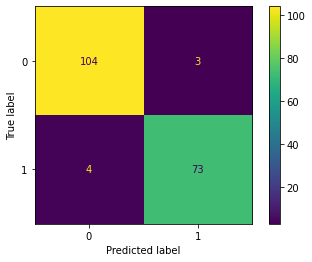

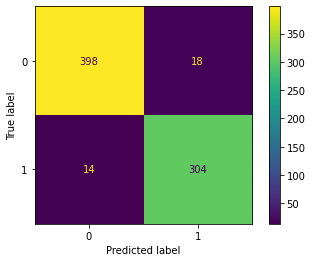

In [ ]:
from sklearn import metrics
predicted_test = pd.DataFrame(p_test_voting)
predicted_train = pd.DataFrame(p_train_voting)
print('=============================================')
print('Scoring Metrics for Soft Voting (Validation)')
print('=============================================')
print('Balanced Accuracy Score = {}'.format(metrics.balanced_accuracy_score(y_test, predicted_test)))
print('Accuracy Score = {}'.format(metrics.accuracy_score(y_test, predicted_test)))
print('Precision Score = {}'.format(metrics.precision_score(y_test, predicted_test)))
print('F1 Score = {}'.format(metrics.f1_score(y_test, predicted_test, labels=['0','1'])))
print('Recall Score = {}'.format(metrics.recall_score(y_test, predicted_test, labels=['0','1'])))
print('ROC AUC Score = {}'.format(metrics.roc_auc_score(y_test, predicted_test, labels=['0','1'])))
print('Confusion Matrix')
print('==================')
print(metrics.confusion_matrix(y_test, predicted_test))
print('==================')
print(metrics.classification_report(y_test, predicted_test, target_names=['0','1']))
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, predicted_test)).plot()


print('=============================================')
print('Scoring Metrics for Soft Voting (Training)')
print('=============================================')
print('Balanced Accuracy Score = {}'.format(metrics.balanced_accuracy_score(y_train, predicted_train)))
print('Accuracy Score = {}'.format(metrics.accuracy_score(y_train, predicted_train)))
print('Precision Score = {}'.format(metrics.precision_score(y_train, predicted_train)))
print('F1 Score = {}'.format(metrics.f1_score(y_train, predicted_train)))
print('Recall Score = {}'.format(metrics.recall_score(y_train, predicted_train, labels=['0','1'])))
print('ROC AUC Score = {}'.format(metrics.roc_auc_score(y_train, predicted_train, labels=['0','1'])))
print('Confusion Matrix')
print('==================')
print(metrics.confusion_matrix(y_train, predicted_train))
print('==================')
print(metrics.classification_report(y_train, predicted_train, target_names=['0','1']))
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_train, predicted_train)).plot()